In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
df=pd.read_csv("Real-life+example.csv")
df

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[4345 rows x 9 columns]

In [3]:
df.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [4]:
  modified_data=df.drop(["Model"],axis=1)
modified_data

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4340          yes  2014  
4341          yes  1999  
4342          yes  1985  
4343          yes  2014  
4344          yes  2013  

[4345 rows x 8 columns]

In [5]:
modified_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
#handling missing value 
new_df=modified_data.dropna(axis=0)
new_df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [7]:
col=new_df.describe()
col


Price      Mileage      EngineV         Year
count    4025.000000  4025.000000  4025.000000  4025.000000
mean    19552.308065   163.572174     2.764586  2006.379627
std     25815.734988   103.394703     4.935941     6.695595
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    90.000000     1.800000  2003.000000
50%     11500.000000   158.000000     2.200000  2007.000000
75%     21900.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000

In [8]:
col=col.columns.values
col

array(['Price', 'Mileage', 'EngineV', 'Year'], dtype=object)

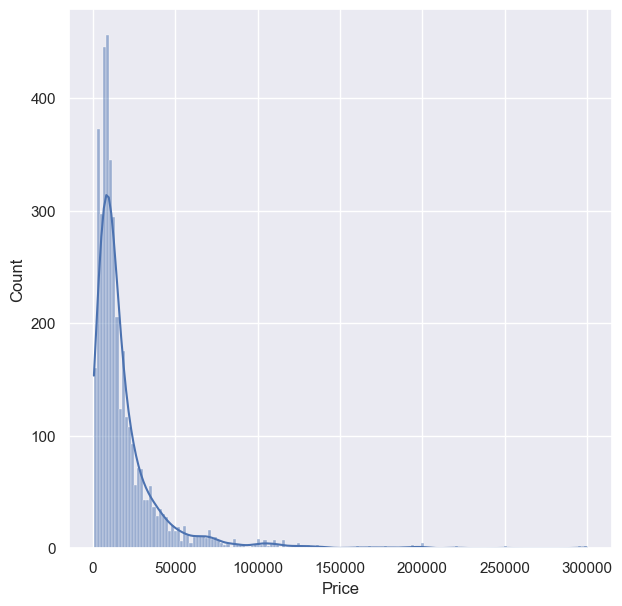

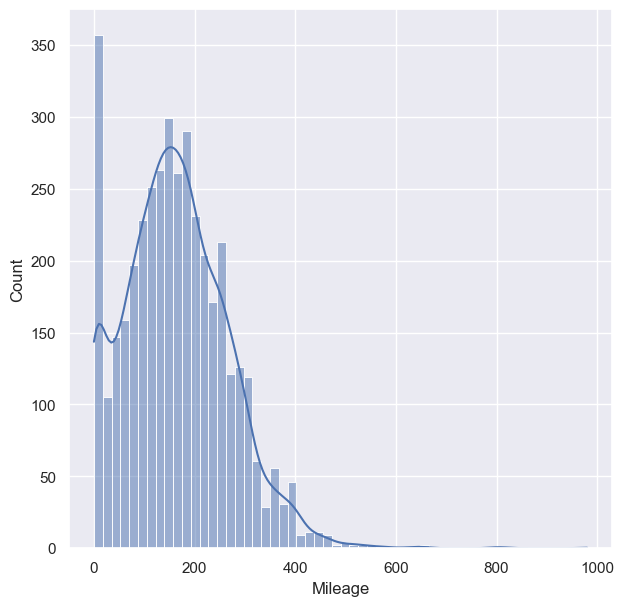

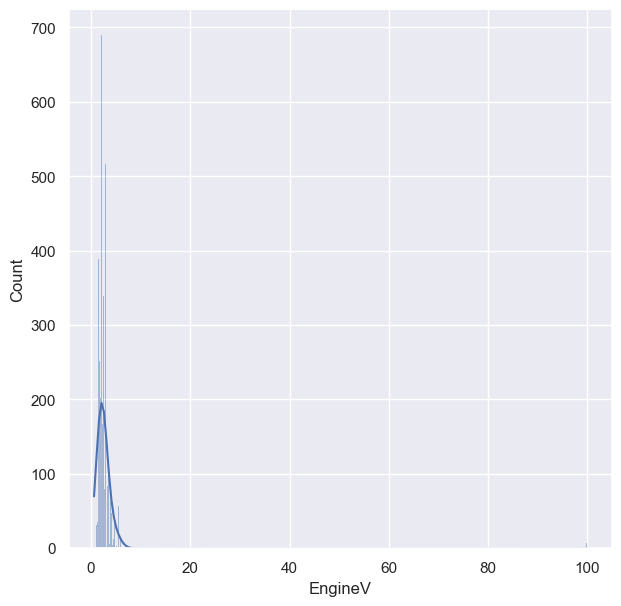

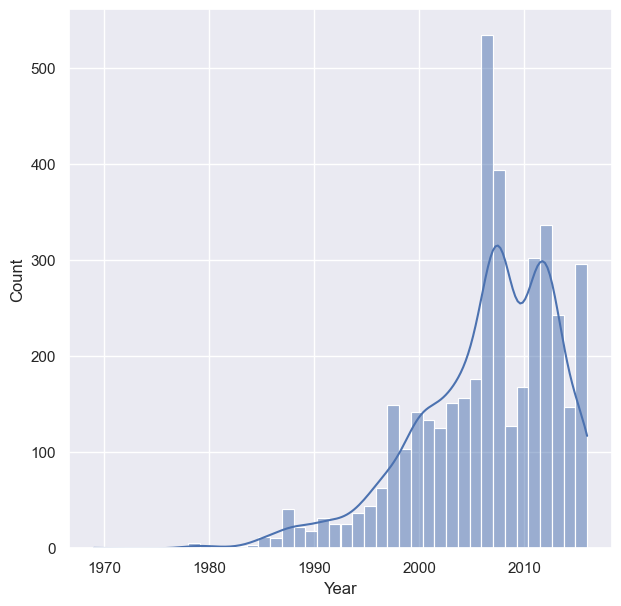

In [9]:
#checking for normal distribution
for i in col:
    plt.figure(figsize=(7,7))
    sns.histplot(new_df[i],kde=True)#by seeing the figure it can be analysed that data is not normally distributed 

In [10]:
#removing the outliers for price
q=new_df["Price"].quantile(.99)
data_1 =new_df[new_df["Price"]<q]
data_1.describe()

Price      Mileage      EngineV         Year
count    3984.000000  3984.000000  3984.000000  3984.000000
mean    17837.117460   165.116466     2.743770  2006.292922
std     18976.268315   102.766126     4.956057     6.672745
min       600.000000     0.000000     0.600000  1969.000000
25%      6980.000000    93.000000     1.800000  2002.750000
50%     11400.000000   160.000000     2.200000  2007.000000
75%     21000.000000   230.000000     3.000000  2011.000000
max    129222.000000   980.000000    99.990000  2016.000000

In [11]:
#removing outlier for Mileage
q=data_1["Mileage"].quantile(.99)
data_2 =data_1[data_1["Mileage"]<q]
data_2.describe()

Price      Mileage      EngineV         Year
count    3944.000000  3944.000000  3944.000000  3944.000000
mean    17933.880822   161.484026     2.747612  2006.389959
std     19008.212025    96.027108     4.980406     6.595986
min       600.000000     0.000000     0.600000  1969.000000
25%      7000.000000    92.000000     1.800000  2003.000000
50%     11500.000000   158.000000     2.200000  2007.000000
75%     21376.250000   230.000000     3.000000  2011.000000
max    129222.000000   435.000000    99.990000  2016.000000

In [12]:
#since limit of enginev is 6.5 
data_3=data_2[data_2["EngineV"]<6.5]
data_3.describe()

Price      Mileage      EngineV         Year
count    3921.000000  3921.000000  3921.000000  3921.000000
mean    17988.421311   161.279776     2.443497  2006.406019
std     19041.658686    96.068269     0.946198     6.595871
min       600.000000     0.000000     0.600000  1969.000000
25%      7000.000000    92.000000     1.800000  2003.000000
50%     11500.000000   158.000000     2.200000  2008.000000
75%     21500.000000   229.000000     3.000000  2012.000000
max    129222.000000   435.000000     6.300000  2016.000000

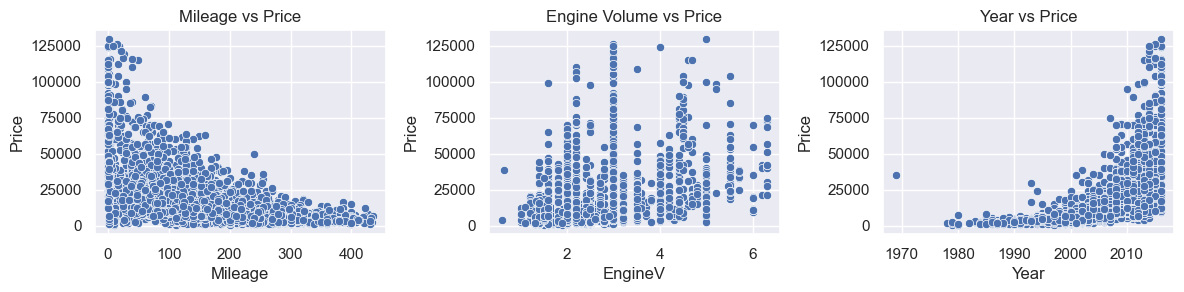

In [13]:
#ols assumption 
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# 3x3 grid - first scatter plot in position 1
plt.subplot(3, 3, 1)
sns.scatterplot(x=data_3["Mileage"], y=data_3['Price'])
plt.title("Mileage vs Price")

# Second scatter plot in position 2
plt.subplot(3, 3, 2)
sns.scatterplot(x=data_3["EngineV"], y=data_3['Price'])
plt.title("Engine Volume vs Price")

# Third scatter plot in position 3
plt.subplot(3, 3, 3)
sns.scatterplot(x=data_3["Year"], y=data_3['Price'])
plt.title("Year vs Price")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()#the graph is showing exponentiality 

In [14]:
data_3["log_price"]=np.log(data_3['Price'])
data_3

C:\Users\Dell\AppData\Local\Temp\ipykernel_4184\1249366808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["log_price"]=np.log(data_3['Price'])


Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  log_price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
4339          yes  2014   9.792556  
4340          yes  2014  11.736069  
4341          yes  1999   8.779557  
4342          yes  1985   8.987197  
4344          yes  2013   9.510445  

[3921 rows x 9 columns]

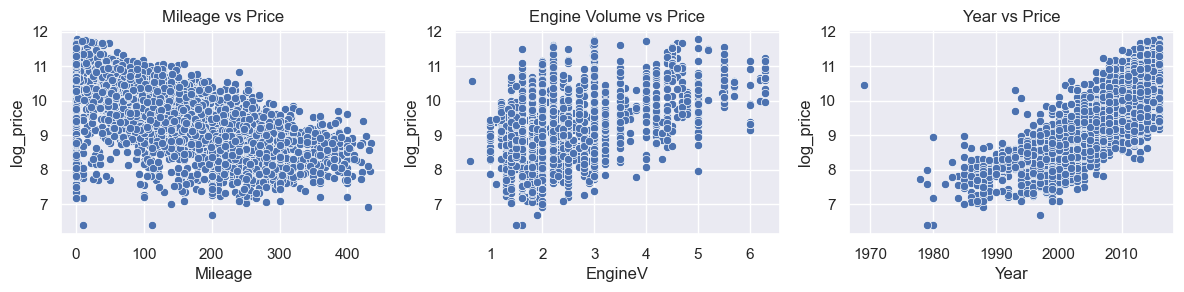

In [15]:

plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# 3x3 grid - first scatter plot in position 1
plt.subplot(3, 3, 1)
sns.scatterplot(x=data_3["Mileage"], y=data_3["log_price"])
plt.title("Mileage vs Price")

# Second scatter plot in position 2
plt.subplot(3, 3, 2)
sns.scatterplot(x=data_3["EngineV"], y=data_3["log_price"])
plt.title("Engine Volume vs Price")

# Third scatter plot in position 3
plt.subplot(3, 3, 3)
sns.scatterplot(x=data_3["Year"], y=data_3["log_price"])
plt.title("Year vs Price")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()#the graph is showing exponentiality 


In [23]:
data_cleaned=data_3
data_cleaned=data_cleaned.drop(["Price"],axis=1)
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
data_cleaned

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277     2.00      Petrol          yes   
1     Mercedes-Benz        van      427     2.90      Diesel          yes   
2     Mercedes-Benz      sedan      358     5.00         Gas          yes   
3              Audi  crossover      240     4.20      Petrol          yes   
4            Toyota  crossover      120     2.00      Petrol          yes   
7              Audi      vagon      200     2.70      Diesel          yes   
8           Renault      vagon      193     1.50      Diesel          yes   
9        Volkswagen      other      212     1.80         Gas           no   
10          Renault      vagon      177     1.50      Diesel          yes   
11          Renault      sedan      260     1.79      Petrol          yes   
12             Audi      vagon      165     2.70         Gas          yes   
13       Volkswagen      sedan      100     1.80      Petrol          yes   
14           Toyota  crossover      250     4.70         Gas          yes   
15          Renault      hatch       84     1.50      Diesel          yes   
16              BMW      other      203     2.00      Petrol           no   
18           Toyota  crossover       21     2.00      Petrol          yes   
19             Audi      vagon      250     2.50      Diesel           no   
20           Toyota      other        0     2.40      Diesel          yes   
21       Volkswagen      hatch      132     1.40      Diesel          yes   
22             Audi      sedan      225     2.40         Gas          yes   
23       Mitsubishi  crossover      130     2.40         Gas          yes   
24             Audi      sedan      163     4.20      Diesel          yes   
25       Volkswagen  crossover      151     3.00      Diesel          yes   
26             Audi      sedan      330     2.40      Petrol          yes   
27    Mercedes-Benz      other      171     2.20       Other           no   
28       Mitsubishi      hatch       65     1.30      Petrol          yes   
30             Audi      sedan        1     2.30         Gas          yes   
31              BMW      other       72     3.00      Petrol          yes   
32       Mitsubishi  crossover       87     3.80         Gas          yes   
33              BMW  crossover      160     4.80         Gas          yes   
34       Volkswagen        van      160     1.90      Diesel          yes   
35           Toyota      sedan      147     2.40         Gas          yes   
36              BMW      sedan      300     2.80      Petrol          yes   
37              BMW  crossover        1     2.50      Diesel          yes   
38             Audi      other       14     1.80      Petrol          yes   
40    Mercedes-Benz        van      230     2.15      Diesel          yes   
41    Mercedes-Benz  crossover       86     5.50      Petrol          yes   
42              BMW      sedan      326     2.80      Petrol          yes   
43    Mercedes-Benz        van       30     2.20      Diesel          yes   
44           Toyota      sedan      181     2.40      Petrol          yes   
45              BMW  crossover       80     3.00      Petrol          yes   
46       Mitsubishi      sedan      220     2.40      Petrol          yes   
47              BMW      sedan      231     2.50      Petrol          yes   
48    Mercedes-Benz      sedan      134     5.00      Petrol          yes   
49              BMW      sedan      335     2.80      Petrol          yes   
51          Renault        van       66     1.50      Diesel          yes   
52    Mercedes-Benz  crossover      172     3.50       Other          yes   
53    Mercedes-Benz      sedan      317     5.00      Petrol          yes   
54    Mercedes-Benz        van      266     2.20      Diesel          yes   
57       Volkswagen      vagon      265     2.00      Diesel           no   
58              BMW  crossover      162     4.80      Petrol          yes   
59        

In [26]:
#checking for the multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
variables=data_cleaned[["Year","Mileage","EngineV"]]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns
vif#since year vif>6 hence we will drop year

VIF Features
0  10.397185     Year
1   3.791073  Mileage
2   7.671170  EngineV

In [28]:
no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
no_multicollinearity

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277     2.00      Petrol          yes   
1     Mercedes-Benz        van      427     2.90      Diesel          yes   
2     Mercedes-Benz      sedan      358     5.00         Gas          yes   
3              Audi  crossover      240     4.20      Petrol          yes   
4            Toyota  crossover      120     2.00      Petrol          yes   
7              Audi      vagon      200     2.70      Diesel          yes   
8           Renault      vagon      193     1.50      Diesel          yes   
9        Volkswagen      other      212     1.80         Gas           no   
10          Renault      vagon      177     1.50      Diesel          yes   
11          Renault      sedan      260     1.79      Petrol          yes   
12             Audi      vagon      165     2.70         Gas          yes   
13       Volkswagen      sedan      100     1.80      Petrol          yes   
14           Toyota  crossover      250     4.70         Gas          yes   
15          Renault      hatch       84     1.50      Diesel          yes   
16              BMW      other      203     2.00      Petrol           no   
18           Toyota  crossover       21     2.00      Petrol          yes   
19             Audi      vagon      250     2.50      Diesel           no   
20           Toyota      other        0     2.40      Diesel          yes   
21       Volkswagen      hatch      132     1.40      Diesel          yes   
22             Audi      sedan      225     2.40         Gas          yes   
23       Mitsubishi  crossover      130     2.40         Gas          yes   
24             Audi      sedan      163     4.20      Diesel          yes   
25       Volkswagen  crossover      151     3.00      Diesel          yes   
26             Audi      sedan      330     2.40      Petrol          yes   
27    Mercedes-Benz      other      171     2.20       Other           no   
28       Mitsubishi      hatch       65     1.30      Petrol          yes   
30             Audi      sedan        1     2.30         Gas          yes   
31              BMW      other       72     3.00      Petrol          yes   
32       Mitsubishi  crossover       87     3.80         Gas          yes   
33              BMW  crossover      160     4.80         Gas          yes   
34       Volkswagen        van      160     1.90      Diesel          yes   
35           Toyota      sedan      147     2.40         Gas          yes   
36              BMW      sedan      300     2.80      Petrol          yes   
37              BMW  crossover        1     2.50      Diesel          yes   
38             Audi      other       14     1.80      Petrol          yes   
40    Mercedes-Benz        van      230     2.15      Diesel          yes   
41    Mercedes-Benz  crossover       86     5.50      Petrol          yes   
42              BMW      sedan      326     2.80      Petrol          yes   
43    Mercedes-Benz        van       30     2.20      Diesel          yes   
44           Toyota      sedan      181     2.40      Petrol          yes   
45              BMW  crossover       80     3.00      Petrol          yes   
46       Mitsubishi      sedan      220     2.40      Petrol          yes   
47              BMW      sedan      231     2.50      Petrol          yes   
48    Mercedes-Benz      sedan      134     5.00      Petrol          yes   
49              BMW      sedan      335     2.80      Petrol          yes   
51          Renault        van       66     1.50      Diesel          yes   
52    Mercedes-Benz  crossover      172     3.50       Other          yes   
53    Mercedes-Benz      sedan      317     5.00      Petrol          yes   
54    Mercedes-Benz        van      266     2.20      Diesel          yes   
57       Volkswagen      vagon      265     2.00      Diesel           no   
58              BMW  crossover      162     4.80      Petrol          yes   
59        

In [30]:
#creating dummies
data_with_dummy=pd.get_dummies(no_multicollinearity,drop_first=True)
data_with_dummy.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

In [31]:
data_with_dummy.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [97]:
cols=['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']


In [98]:
data_preprocessed=data_with_dummy[cols]#adding log_price
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

In [99]:
#creating input and target for linear regression model
target=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)


In [100]:
inputs.head()

Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  Brand_Mitsubishi  \
0      277      2.0          1                    0                 0   
1      427      2.9          0                    1                 0   
2      358      5.0          0                    1                 0   
3      240      4.2          0                    0                 0   
4      120      2.0          0                    0                 0   

   Brand_Renault  Brand_Toyota  Brand_Volkswagen  Body_hatch  Body_other  \
0              0             0                 0           0           0   
1              0             0                 0           0           0   
2              0             0                 0           0           0   
3              0             0                 0           0           0   
4              0             1                 0           0           0   

   Body_sedan  Body_vagon  Body_van  Engine Type_Gas  Engine Type_Other  \
0           1           0         0                0                  0   
1           0           0         1                0                  0   
2           1           0         0                1                  0   
3           0           0         0                0                  0   
4           0           0         0                0                  0   

   Engine Type_Petrol  Registration_yes  
0                   1                 1  
1                   0                 1  
2                   0                 1  
3                   1                 1  
4                   1                 1

In [101]:
#scaling a data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [102]:
inputs_scaled=scaler.transform(inputs)

In [103]:
#train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=.20,random_state=42)

In [104]:
#creating regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [105]:
#making prediction
y_hat=reg.predict(x_train)


Text(0, 0.5, 'Y_HAT(PREDICTED)')

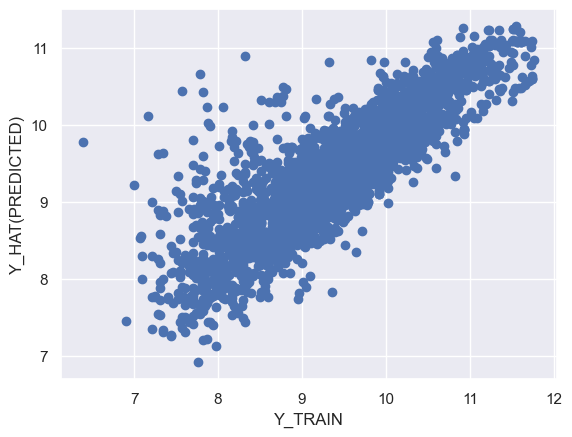

In [106]:
plt.scatter(y_train,y_hat)
plt.xlabel("Y_TRAIN")
plt.ylabel("Y_HAT(PREDICTED)")

<AxesSubplot: xlabel='log_price', ylabel='Count'>

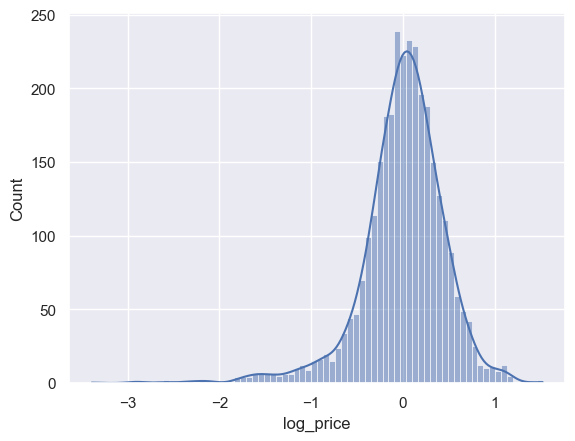

In [107]:
sns.histplot(y_train-y_hat,kde=True)

In [108]:
reg.score(x_train,y_train)

0.733378384924122

In [111]:
#finding weights and bias 
regsummary=pd.DataFrame([	'Mileage',	'EngineV',	'Brand_BMW'	,'Brand_Mercedes-Benz'	,'Brand_Mitsubishi'	,'Brand_Renault',	'Brand_Toyota',	'Brand_Volkswagen'	,'Body_hatch',	'Body_other'	,'Body_sedan',	'Body_vagon','	Body_van','Engine Type_Gas'	,'Engine Type_Other',	'Engine Type_Petrol',	'Registration_yes'	],columns=['Features'])
regsummary['Weights']=reg.coef_
regsummary

Features   Weights
0               Mileage -0.459721
1               EngineV  0.219282
2             Brand_BMW  0.021785
3   Brand_Mercedes-Benz  0.017882
4      Brand_Mitsubishi -0.130822
5         Brand_Renault -0.170994
6          Brand_Toyota -0.049502
7      Brand_Volkswagen -0.080205
8            Body_hatch -0.159875
9            Body_other -0.106945
10           Body_sedan -0.197598
11           Body_vagon -0.129064
12           \tBody_van -0.155026
13      Engine Type_Gas -0.124611
14    Engine Type_Other -0.032212
15   Engine Type_Petrol -0.148443
16     Registration_yes  0.312901

In [112]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [118]:
#testing
y_hat_test=reg.predict(x_test)

In [119]:
reg.score(x_test,y_test)

0.7019474417481371

Text(0, 0.5, 'Y_HAT_TEST(PREDICTED)')

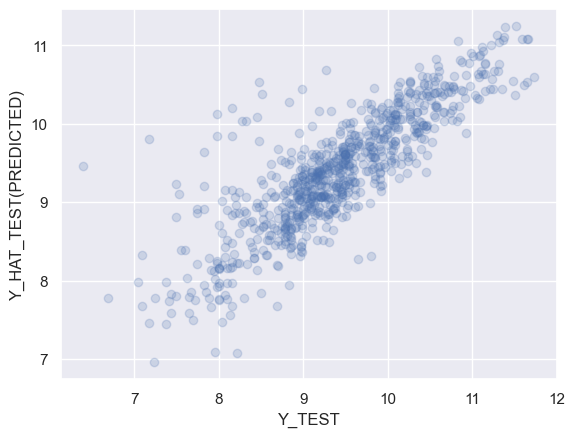

In [120]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel("Y_TEST")
plt.ylabel("Y_HAT_TEST(PREDICTED)")

In [122]:
predicted_price=pd.DataFrame(np.exp(y_hat_test),columns=['Features'])
predicted_price.head()

Features
0  19848.853534
1   6060.515003
2  13098.477588
3   8672.038833
4  25304.427926

In [124]:
predicted_price['Target']=np.exp(y_test)
predicted_price

Features     Target
0    19848.853534        NaN
1     6060.515003        NaN
2    13098.477588        NaN
3     8672.038833        NaN
4    25304.427926        NaN
5    17639.112085        NaN
6    23919.136987        NaN
7    10034.175433        NaN
8    10244.564608   10799.00
9     8967.032882        NaN
10   35978.357430   11950.00
11   18492.352879        NaN
12   15977.425164        NaN
13   23346.553037        NaN
14   16937.980730   16000.00
15   11273.632144        NaN
16    5077.902613    2990.00
17   14980.597295        NaN
18    3456.662050        NaN
19    9020.501251        NaN
20   12369.659606   38233.00
21   43440.120467        NaN
22    8931.752253        NaN
23    9635.610886        NaN
24    9961.836411        NaN
25   13606.615097        NaN
26   34135.089069        NaN
27    4578.431935        NaN
28   22632.681000        NaN
29    5250.748330        NaN
30    3523.800092    2900.00
31   33425.423548        NaN
32    6826.109539        NaN
33    4297.178551   28500.00
34    6047.811165    9800.00
35    7605.479427        NaN
36   33291.383298    6000.00
37    5857.774750   67500.00
38   38071.640034        NaN
39    7650.748498        NaN
40   34492.548722        NaN
41    6876.702694        NaN
42    7342.676755        NaN
43   19158.152956        NaN
44    8096.564539        NaN
45    8672.650880        NaN
46   11852.693313        NaN
47    7384.686604        NaN
48   18873.261201        NaN
49    5004.593673    6500.00
50   11717.802177        NaN
51   11759.921549    8250.00
52   25174.796812        NaN
53    6739.545503        NaN
54    8071.868879        NaN
55    5358.735225        NaN
56    6208.251793        NaN
57   15555.947920        NaN
58   31606.495780        NaN
59    6138.831538   36900.00
60   46098.485766    8900.00
61    8864.069333        NaN
62   40069.143628        NaN
63    3728.699626        NaN
64   10837.544356        NaN
65   22794.207803        NaN
66   11976.006342        NaN
67   31007.180497   69999.00
68   14562.747485        NaN
69   15995.491044        NaN
70    5036.055702    3000.00
71    9412.825992        NaN
72   32955.493333    9000.00
73    2388.629250        NaN
74   43074.381123        NaN
75   12799.792814        NaN
76    5483.577944        NaN
77    1968.365806        NaN
78   33431.529726    3700.00
79   14795.248198   15700.00
80   12123.730175        NaN
81   14260.336318        NaN
82   18248.264842   11990.00
83   22921.736858        NaN
84   16892.426211        NaN
85   19223.407196    6999.00
86   20790.049401        NaN
87    7190.518146        NaN
88   26353.801706        NaN
89   27525.204540   28500.00
90   11324.597556        NaN
91   18443.203226        NaN
92   11344.760974        NaN
93    8712.736094        NaN
94   21334.577941        NaN
95    9553.372876        NaN
96   20171.150367        NaN
97    2506.284784        NaN
98   11799.404728    4099.00
99   16106.605403        NaN
100  10333.667067        NaN
101  16381.984526        NaN
102  10552.882195        NaN
103   8864.069333        NaN
104  20047.464026  107999.00
105  15920.005210        NaN
106  26274.581347        NaN
107  25642.441275        NaN
108  20740.602090        NaN
109   6834.026275        NaN
110   4947.006128        NaN
111   8449.829917        NaN
112   7873.981202        NaN
113  33291.383298        NaN
114   5006.738341   11100.00
115  29044.025730        NaN
116   4859.428397        NaN
117  11365.766061        NaN
118  21819.028373        NaN
119   6866.812071        NaN
120   4098.695794        NaN
121  32724.761233        NaN
122   4905.326423        NaN
123  10837.544356    8900.00
124  17576.820500        NaN
125  29140.174334        NaN
126   4179.989412        NaN
127   7100.759211        NaN
128  15037.699436        NaN
129  15534.993925        NaN
130   2937.660599        NaN
131  14959.685913        NaN
132   8998.933365        NaN
133  24643.547997        NaN
134   6959.316118        NaN
135  31735.596373        NaN
136  32049.005416        NaN
137  14